In [5]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

Add required project paths 



In [ ]:
dataset_path = '..\data\processed\keypoint.csv'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\flees\AppData\Local\Temp\ipykernel_22116\155567835.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset_path = '..\data\processed\keypoint.csv'


In [16]:
NUM_CLASSES = 4

df = pd.read_csv(dataset_path, header=None)

y_dataset = df.iloc[:, 0].astype('int32').values
X_dataset = df.iloc[:, 1:43].astype('float32').values

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=42)


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary() 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,114 (4.35 KB)

 Trainable params: 1,114 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_save_path = '..\models\keypoint_classifier\keypoint_classifier.keras'
tflite_save_path = '..\models\keypoint_classifier\keypoint_classifier.tflite'

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)


es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\flees\AppData\Local\Temp\ipykernel_22116\248860882.py:1: SyntaxWarning: invalid escape sequence '\m'
  model_save_path = '..\models\keypoint_classifier\keypoint_classifier.keras'
C:\Users\flees\AppData\Local\Temp\ipykernel_22116\248860882.py:2: SyntaxWarning: invalid escape sequence '\m'
  tflite_save_path = '..\models\keypoint_classifier\keypoint_classifier.tflite'


# Model training

In [20]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)



Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 20s 741ms/step - accuracy: 0.2422 - loss: 1.4918
Epoch 1: val_loss improved from None to 1.27596, saving model to ..\models\keypoint_classifier\keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3312 - loss: 1.3904 - val_accuracy: 0.4787 - val_loss: 1.2760
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3438 - loss: 1.3459
Epoch 2: val_loss improved from 1.27596 to 1.19431, saving model to ..\models\keypoint_classifier\keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3994 - loss: 1.2950 - val_accuracy: 0.5664 - val_loss: 1.1943
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4219 - loss: 1.2626
Epoch 3: val_loss improved from 1.19431 to 1.12115, saving model to ..\models\keypoint_classifier\keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4270 - loss: 1.2228 - val_accuracy: 0.6074 - val_loss: 1.1212
Epoch 4/1000
 1/29 ━━━━

In [21]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9657 - loss: 0.1965 


In [22]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [23]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[9.8295492e-01 1.6757213e-02 1.9138705e-04 9.6563570e-05]
0


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


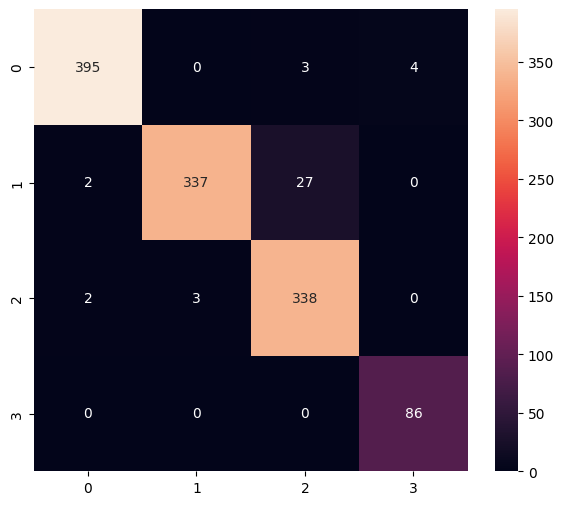

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       402
           1       0.99      0.92      0.95       366
           2       0.92      0.99      0.95       343
           3       0.96      1.00      0.98        86

    accuracy                           0.97      1197
   macro avg       0.96      0.97      0.97      1197
weighted avg       0.97      0.97      0.97      1197



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))
    

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)